<a href="https://colab.research.google.com/github/ShehanAnnasiwatta/DL-Assignment-Y4S1/blob/Harith_CNN/Change_To_GemIdentifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip install numpy pandas matplotlib tensorflow opendatasets -q

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [4]:
#Download data set from kaggele
od.download("https://www.kaggle.com/datasets/lsind18/gemstones-images")

Skipping, found downloaded files in "./gemstones-images" (use force=True to force download)


In [5]:
BATCH_SIZE = 32
IMAGE_SIZE =(256,256)

train_data_dir = "/content/gemstones-images/train"
test_data_dir = "/content/gemstones-images/test"

In [6]:
# Load the datasets
train_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    subset='training',
    validation_split=0.1,
    seed=42
)

validation_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation',
    validation_split=0.1,
    seed=42
)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

class_names=train_data.class_names
class_names

# Print shapes to verify loading
print("Train Data:", train_data)
print("Validation Data:", validation_data)

Found 2856 files belonging to 87 classes.
Using 2571 files for training.
Found 2856 files belonging to 87 classes.
Using 285 files for validation.
Found 363 files belonging to 87 classes.
Train Data: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Validation Data: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [7]:
for image_batch,label_batch in train_data.take(1):
   print(image_batch.shape)
   print(label_batch .shape)

(32, 256, 256, 3)
(32,)


In [8]:
train_data=train_data.map(lambda x,y:(x/255.0,y))
validation_data=validation_data.map(lambda x,y:(x/255.0,y))
test_data=test_data.map(lambda x,y:(x/255.0,y))

# Cache and Prefetch
train_data = train_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
validation_data = validation_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Print shapes to verify loading
print("Train Data:", train_data)
print("Validation Data:", validation_data)

Train Data: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Validation Data: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [9]:
#Add Data Augmentation

data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(256,256,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:

# Start to create the model
model = tf.keras.models.Sequential()  # Create the model as Sequential


# Adding the conventional layers
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', input_shape=(256,256, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())

# Flatten layer
model.add(tf.keras.layers.Flatten())  # Flatten the input

# Adding dropout after flattening
model.add(tf.keras.layers.Dropout(0.2))

# Batch normalization after flattening
model.add(tf.keras.layers.BatchNormalization())

# Fully connected layers
model.add(tf.keras.layers.Dense(256, activation='relu'))  # Dense layer with 128 neurons
model.add(tf.keras.layers.Dense(128, activation='relu'))  # Dense layer with 128 neurons
model.add(tf.keras.layers.Dense(64, activation='relu'))    # Dense layer with 32 neurons

model.add(tf.keras.layers.Dense(87, activation='softmax'))

from tensorflow.keras.optimizers import Adam

# Use a smaller learning rate
optimizer = Adam(learning_rate=0.01)

# Compile the model (add this step)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Correct loss function for integer-encoded labels
              metrics=['accuracy'])


# Check the datasets
print("Train Data:", train_data)
print("Validation Data:", validation_data)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train Data: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Validation Data: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [11]:
# Train the model
history = model.fit(
    train_data,
    epochs=50,
    validation_data=validation_data
)


Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 88s 681ms/step - accuracy: 0.0326 - loss: 6.0002 - val_accuracy: 0.0175 - val_loss: 4.4648
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 26s 319ms/step - accuracy: 0.0336 - loss: 4.4003 - val_accuracy: 0.0105 - val_loss: 4.4615
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 41s 313ms/step - accuracy: 0.0456 - loss: 4.3667 - val_accuracy: 0.0105 - val_loss: 4.4696
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 26s 321ms/step - accuracy: 0.0525 - loss: 4.3415 - val_accuracy: 0.0105 - val_loss: 4.5786
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 40s 313ms/step - accuracy: 0.0567 - loss: 4.3001 - val_accuracy: 0.0456 - val_loss: 4.6612
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 41s 318ms/step - accuracy: 0.0746 - loss: 4.2342 - val_accuracy: 0.0386 - val_loss: 4.4218
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 25s 315ms/step - accuracy: 0.0694 - loss: 4.1758 - val_accuracy: 0.0316 - val_loss: 4.8037
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 25s 312ms/step - accuracy: 0.0729 - loss: 4.1748 - val_accu

In [12]:
#Add the performance matrices

# Use CategoricalAccuracy for multi-class classification with one-hot encoded labels
accuracy = tf.keras.metrics.CategoricalAccuracy()

# Precision and Recall can be used, but they are typically applied on a per-class basis
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()


In [13]:
for batch in test_data.as_numpy_iterator():
    x, y = batch
    # Predict the probability distribution for each class
    yhat = model.predict(x)

    # Convert predicted probabilities to class labels using argmax
    yhat_class = np.argmax(yhat, axis=1)

    # Update metrics using the true labels and predicted class labels
    precision.update_state(y, yhat_class)
    recall.update_state(y, yhat_class)
    accuracy.update_state(y, yhat_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [14]:
''' #Use the transfer learning
from tensorflow.keras.applications import VGG16

# Load pre-trained VGG16 model + higher-level layers
base_model = VGG16(input_shape=(256, 256, 3), include_top=False, weights='imagenet')

# Freeze the base model layers
base_model.trainable = False

# Create a new model on top of it
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data) '''


" #Use the transfer learning\nfrom tensorflow.keras.applications import VGG16\n\n# Load pre-trained VGG16 model + higher-level layers\nbase_model = VGG16(input_shape=(256, 256, 3), include_top=False, weights='imagenet')\n\n# Freeze the base model layers\nbase_model.trainable = False\n\n# Create a new model on top of it\nmodel = tf.keras.models.Sequential([\n    base_model,\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(128, activation='relu'),\n    tf.keras.layers.Dropout(0.5),\n    tf.keras.layers.Dense(10, activation='softmax')\n])\n\n# Compile the model\nmodel.compile(optimizer='adam',\n              loss='sparse_categorical_crossentropy',\n              metrics=['accuracy'])\n\n# Train the model\nhistory = model.fit(train_data,\n                    epochs=20,\n                    validation_data=validation_data) "

In [15]:
#Use opencv to read the image
! pip install opencv-python

In [16]:
#Import the open cv
import cv2

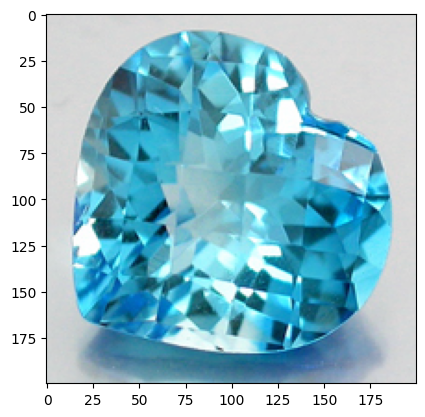

In [17]:
#Add open cv to read the image
image=cv2.imread('/content/gemstones-images/test/Citrine/citrine_3.jpg')
plt.imshow(image)  #Show the testing image
plt.show()

In [18]:
#create the image resize
resized_image=tf.image.resize(image,IMAGE_SIZE)
scaled_image=resized_image/255

In [19]:
#Create image as (1,128,128,3)
np.expand_dims(scaled_image,0).shape


(1, 256, 256, 3)

In [20]:
#Expand the dimensions

# Assuming y_hat is the output from a softmax layer (for multi-class classification)
y_hat = model.predict(np.expand_dims(scaled_image, 0))

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(y_hat, axis=-1)

# Print the relevant class name based on the predicted index
print(f'Predicted class: {class_names[predicted_class_index[0]]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: Zircon
